

# Project: tmdb movies analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 

In this data we're going to be analysing data about tmdb movies and in particular we will be interested in finding best films in a paritcular year and  we will try to find trends between variables.

### Question(s) for Analysis
 

**Using intuition we will state some questions that we're going to look deeper into them in the sections below.**

>What are the best directors based on average vote of film viewers ?

>Which films made the most revenue in 2014 ?

>Did movies with higher vote count received a better rating?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline




<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Many rows such as "genre", "cast", "production companies" contain many values ,seperated by an "|"


Using shape attribute this has 10866 entries (from 0 to 10865) and 21 columns 

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The info function shows that many columns has null values we will try to look deeper.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad3e1a6b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fad3df32668>]], dtype=object)

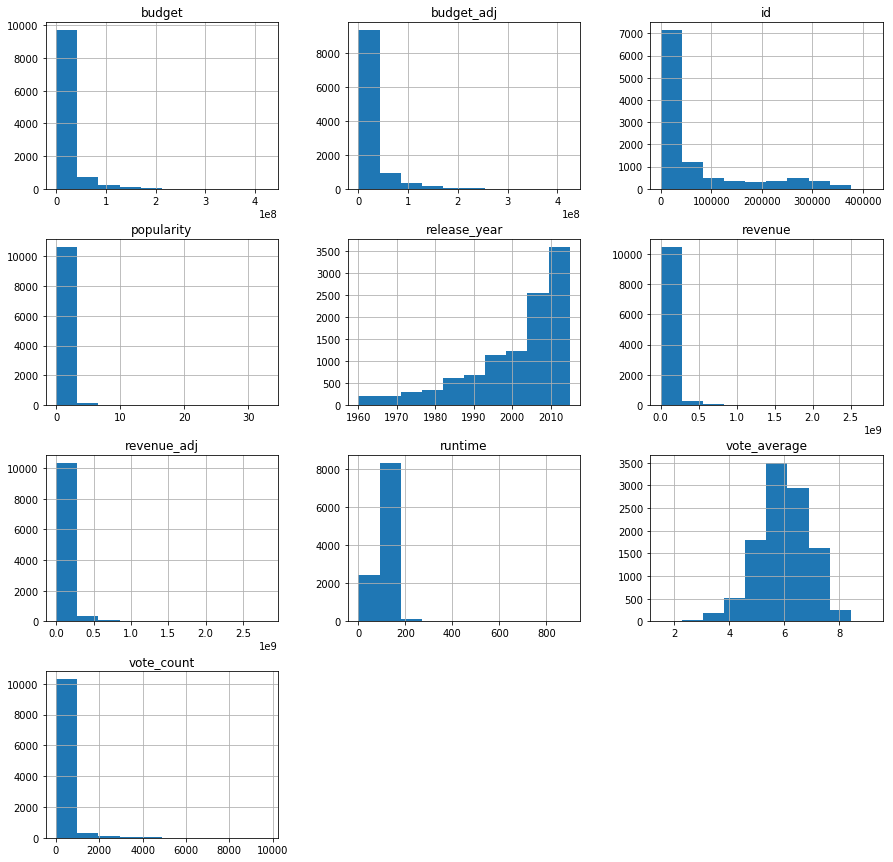

In [5]:
df.hist(figsize = (15,15))

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



the describe method and hist method indicate that many columns contain many zeros like "budget", "revnue","runtime".

Also , we have columns that we're not going to be using them like in our analysis :
columns names : 
imbd_id,
id,
homepage,
tagline,
keyword,
overview,

In [7]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

We have one duplicate in this dataset.


### Data Cleaning


In [8]:
df.drop(columns = ["imdb_id", "id", "homepage", "tagline", "keywords", "overview"], inplace = True)

The zeros will be replaced by np.nan using replace method then we will drop all the null values .

In [9]:
df["budget"].replace(0, np.nan, inplace = True)
df["revenue"].replace(0, np.nan, inplace = True)
df["runtime"].replace(0, np.nan, inplace = True)
df["budget_adj"].replace(0, np.nan, inplace = True)
df["budget_adj"].replace(0, np.nan, inplace = True)

In [10]:
df.dropna(axis = 0, inplace = True)

In [11]:
df.drop_duplicates(inplace = True)
df.duplicated().value_counts()

False    3805
dtype: int64

We dropped the duplicate as we can see all the rows are non duplicate

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: float64(7), int64(2), object(6)
memory usage: 475.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis








### Question 1 ; what are the best directors based on average vote of film viewers ?

In [13]:
df1 = df.groupby("director")["vote_average"].mean().sort_values(ascending = False)
df1 = df1.head(20)
df1.to_frame()

,vote_average
director,
Damien Chazelle,8.2000
Pete Docter,8.0000
Tony Kaye,8.0000
Morten Tyldum,8.0000
Xavier Dolan,8.0000
Lenny Abrahamson,8.0000
Rajkumar Hirani,7.8000
Don Hall|Chris Williams,7.8000
Jaco Van Dormael,7.8000


### Question 2 : Top 10 movies and genres that made the most revenue in 2014

In [14]:
def create_graph(data_frame, kind , x , y, title):
    data_frame.plot(kind = kind, x = x, y = y,  color = "red", alpha = 0.5,figsize = (13,6))
    plt.xlabel(x ,fontsize = 25)
    plt.ylabel(y , fontsize = 25)
    plt.title(title , fontsize = 30)

We will be using this function to create and format graphs

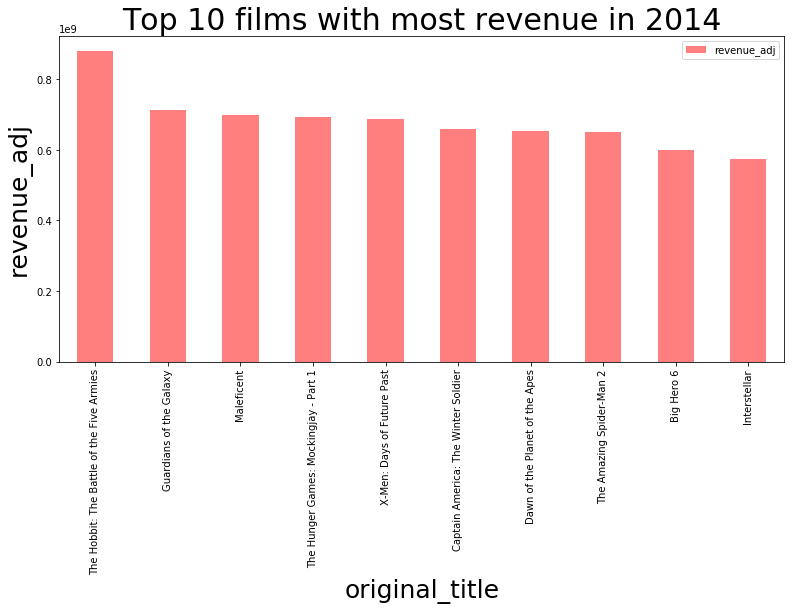

In [15]:
df2 = df[df["release_year"] == 2014]
df2 = df2[["revenue_adj","original_title", "genres"]].sort_values("revenue_adj", ascending = False).head(10)

create_graph(data_frame = df2 , kind = "bar", x = "original_title", y = "revenue_adj", title = "Top 10 films with most revenue in 2014")

Here we have a bar chart showing the top 10 films in 2014 which generated the most revenue.
as we can see the movies name is on the x asis and the revenue is on the y axix

In [16]:
df2.head(10)

,revenue_adj,original_title,genres
634,8.797523e+08,The Hobbit: The Battle of the Five Armies,Adventure|Fantasy
630,7.122911e+08,Guardians of the Galaxy,Action|Science Fiction|Adventure
660,6.985650e+08,Maleficent,Fantasy|Adventure|Action|Family|Romance
633,6.927528e+08,The Hunger Games: Mockingjay - Part 1,Science Fiction|Adventure|Thriller
643,6.871339e+08,X-Men: Days of Future Past,Action|Adventure|Fantasy|Science Fiction
631,6.583651e+08,Captain America: The Winter Soldier,Action|Adventure|Science Fiction
651,6.523167e+08,Dawn of the Planet of the Apes,Science Fiction|Action|Drama|Thriller
654,6.500300e+08,The Amazing Spider-Man 2,Action|Adventure|Fantasy
635,6.006485e+08,Big Hero 6,Adventure|Family|Animation|Action|Comedy
629,5.726906e+08,Interstellar,Adventure|Drama|Science Fiction


### Question 3 : what movie type has the highest runtime frequency ?

In [17]:
df["runtime"].describe()

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [18]:
bin_edges = [15, 96, 106, 119, 338]
bin_names = ["very short", "short", "medium", "long"]
df3 = pd.cut(df['runtime'], bin_edges, labels=bin_names).value_counts()
df3

very short    1032
short          950
long           938
medium         884
Name: runtime, dtype: int64

Using the describe method, precisely quartiles, we devided the runtime into four length types  : 
>**very short , short, medium and long**

Now let's see the frequency of each type :

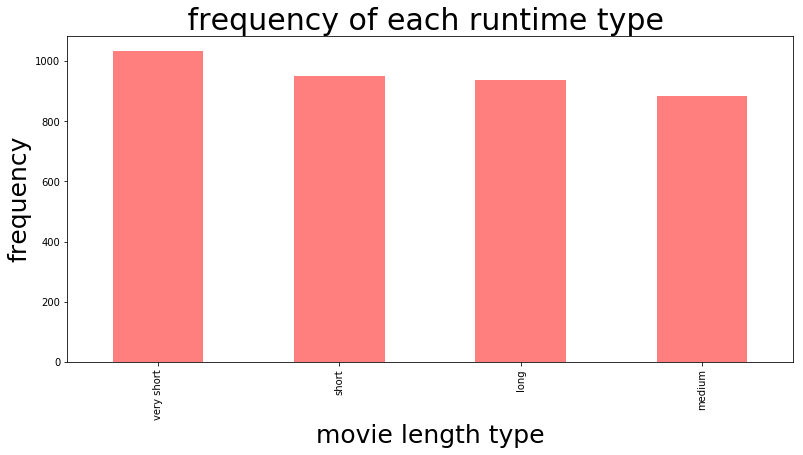

In [19]:
create_graph(data_frame = df3, title = " frequency of each runtime type  ", x= "movie length type", y = "frequency", kind = "bar")

### Question 4 : are movies with higher vote count more popular?

In [20]:
df[["vote_count", "popularity"]].corr()

,vote_count,popularity
vote_count,1.000000,0.779125
popularity,0.779125,1.000000


Using the corr method popularity and vote_count are positivly correlated, so if vote_count increase by 1 unit(vote), popularity increase by 0.78*1unit(popularity)
let's see in more details with a graph

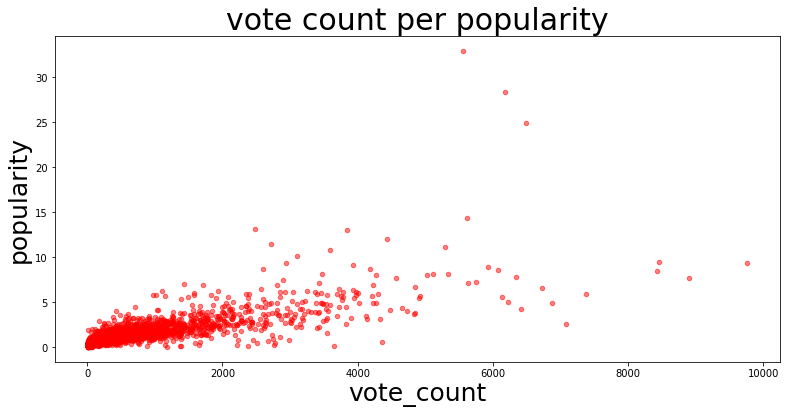

In [21]:
create_graph(data_frame = df,kind = "scatter", x = "vote_count", y = "popularity", title = "vote count per popularity" )



In [22]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='conclusions'></a>
## Conclusions



**Using the describe method we can extract many informations about this data set:**
>In vote_count we can see that 25% of this data received more 584 vote.

>In vote_average 50% of this data received a vote higher than 6.2.(50% is same as median)

>In release_year 75% of movies are made before 2010.

**Question 2 : Top 10 movies that made the most revenue in 2014 and genres**
>the movies that made the most revenues are shown in the bar chart.

>using this informations we can conclude that the genres of movies that made the most revenue are :
Adventure, Fantasy, Science fiction, Action

**Question 3 : what movie type has the highest runtime frequency ?**
>as the graph shows the highest runtime frequency is the "very short" type

>1032 movie in this category,

>this type include movies of lenght between 15 and 96 minutes.

>we can have a look about the other types of runtime in the graph , we can see that short type movies come in second place in term of frequency , then long and medium type.

**Question 4 : Are movies with higher vote count more popular?**

>the scatter plot does indicate that movies with a higher vote_count are more popular even if there are outliers.
Also, the corralation does indicate that higher vote counts result in higher vote averages.
Additional research can be done by removing the outliers and showing the new result. 
Media critics could be useful to see the influence on the popularity and vote count.



Limitations to my research ; 
that this dataset contains at first aroud 10000 entries, but after cleaning and wrangling the data i was left with only 3805 entries.
Also i did not take a deeper look into the production compapanies and the cast of each movie.



My references : pandas documentation , stackoverflow, towardsdatascience




In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0